<a href="https://colab.research.google.com/github/LucasCod-eng/Deep-Learning/blob/main/Deep_Learning_A_Z_Convolucional_MNIST_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow==2.16.1

In [3]:
import tensorflow as tf
import keras
import matplotlib
import numpy as np


In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt

In [7]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28), (10000, 28, 28))

In [10]:
X_treinamento, X_treinamento.max()

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [11]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Text(0.5, 1.0, 'Classe5')

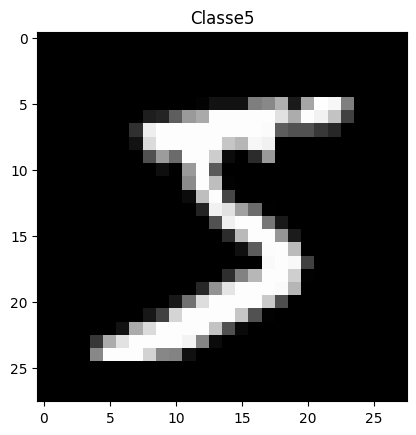

In [16]:
plt.imshow(X_treinamento[0], cmap='gray')
plt.title('Classe' + str(y_treinamento[0]))

In [17]:
X_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28, 28, 1)
X_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)

In [18]:
X_treinamento.shape

(60000, 28, 28, 1)

In [19]:
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [20]:
X_treinamento /= 255
X_teste /= 255

In [21]:
X_treinamento.max(), X_treinamento.min()

(1.0, 0.0)

In [22]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [23]:
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)

In [24]:
y_treinamento

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [25]:
y_treinamento[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# Criado a Estrutura da Rede Neural


In [32]:
from tensorflow.keras.layers import Flatten # Import the Flatten layer

In [44]:
from os import access
rede_neural = Sequential()
rede_neural.add(InputLayer(input_shape=(28, 28, 1)))

rede_neural.add(Conv2D(32, (3, 3), activation='relu'))
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size=(2, 2)))

rede_neural.add(Conv2D(32, (3, 3), activation='relu'))
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size=(2, 2)))

rede_neural.add(Flatten())
rede_neural.add(Dense(units = 128, activation='relu'))
rede_neural.add(Dropout(0.2))
rede_neural.add(Dense(units = 128, activation='relu'))
rede_neural.add(Dropout(0.2))
rede_neural.add(Dense(units = 10, activation='softmax'))

In [45]:
rede_neural.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 11, 11, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,154 (508.41 KB)

 Trainable params: 130,026 (507.91 KB)

 Non-trainable params: 128 (512.00 B)

In [46]:
rede_neural.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
rede_neural.fit(X_treinamento, y_treinamento, batch_size=128, epochs=5, validation_data=(X_teste, y_teste))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 115ms/step - accuracy: 0.8548 - loss: 0.4738 - val_accuracy: 0.9603 - val_loss: 0.1322
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 111ms/step - accuracy: 0.9805 - loss: 0.0671 - val_accuracy: 0.9860 - val_loss: 0.0469
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 110ms/step - accuracy: 0.9854 - loss: 0.0458 - val_accuracy: 0.9907 - val_loss: 0.0300
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 115ms/step - accuracy: 0.9905 - loss: 0.0316 - val_accuracy: 0.9893 - val_loss: 0.0341
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 115ms/step - accuracy: 0.9903 - loss: 0.0311 - val_accuracy: 0.9902 - val_loss: 0.0327


In [48]:
resultado = rede_neural.evaluate(X_teste, y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9870 - loss: 0.0404


In [49]:
resultado

[0.03268629312515259, 0.9901999831199646]